In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [ ]:
!pip install --user --upgrade pixiedust

!pip install --user --upgrade pixiedust

In [3]:
from io import StringIO
import requests
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
def get_file_handle(fname):
    data_path = project.get_file(fname)
    data_path.seek(0)
    return data_path

# CDC Data

In [5]:
# define filename
DATA_PATH = 'cdc_opioid_deaths.csv'

# Using pandas to read the data 
data_path = get_file_handle(DATA_PATH)
loss_of_life_data = pd.read_csv(data_path)
loss_of_life_data = loss_of_life_data.rename(columns = {'Crude Rate':'DeathRate'})
loss_of_life_data.DeathRate.replace("Unreliable", "0", inplace=True)
loss_of_life_data["DeathRate"] = loss_of_life_data.DeathRate.astype("float64")
loss_of_life_data = loss_of_life_data.rename(columns = {'County Code':'fips'})
loss_of_life_data['Crisis'] = np.where(loss_of_life_data['DeathRate']>=22.05, 1, 0)

# Display the first five rows
loss_of_life_data.head()

,County,fips,Deaths,Population,DeathRate,Crisis
0,"Autauga County, AL",1001,10,276918,0.0,0
1,"Baldwin County, AL",1003,69,998713,6.9,0
2,"Blount County, AL",1009,41,288794,14.2,0
3,"Cherokee County, AL",1019,10,129845,0.0,0
4,"Cullman County, AL",1043,32,407016,7.9,0


Crude Rate = Death Rate = Death Count / County Population * 100,000

When the number of is less than 20 in this dataset its marked as "Unreliable", we will replace it with 0 

Renaming County Code to fips to join other data set on it 

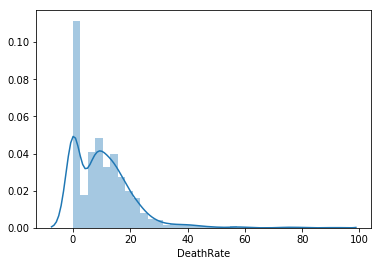

In [6]:
DeathRate=loss_of_life_data['DeathRate']
sns.distplot(DeathRate)
plt.show()

The distribution of death rate is bimodal and right-skewed

Engineering a Boolean response column "Crisis" to classify counties with higher or equal rate of 22.05, since there is a drop of after 20

In [7]:
display(loss_of_life_data)

In [8]:
loss_of_life_data.shape #1616 counties 

(1616, 6)

In [9]:
loss_of_life_data.sort_values(by=['DeathRate'], inplace=True, ascending=False)

print (loss_of_life_data)

                     County   fips  Deaths  Population  DeathRate  Crisis
1564     Wyoming County, WV  54109     103      112804       91.3       1
1525       Boone County, WV  54005      94      118604       79.3       1
1540    McDowell County, WV  54047      79      101626       77.7       1
1546       Mingo County, WV  54059      95      127658       74.4       1
829   Rio Arriba County, NM  35039     148      199672       74.1       1
1528      Cabell County, WV  54011     288      484047       59.5       1
1544      Mercer County, WV  54055     181      307924       58.8       1
1554     Raleigh County, WV  54081     223      390206       57.1       1
513       Powell County, KY  21197      35       61988       56.5       1
460         Clay County, KY  21051      59      105846       55.7       1
1539       Logan County, WV  54045      89      175910       50.6       1
489       Leslie County, KY  21131      27       54356       49.7       1
454     Campbell County, KY  21037    

# Education Data

In [10]:
# define filename
DATA_PATH = 'Education_clean.csv'

# Using pandas to read the data 
data_path = get_file_handle(DATA_PATH)
Education_data = pd.read_csv(data_path, encoding='cp1252')
# Display the first five rows
Education_data.head()

,FIPS Code,State,Area name,"Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
0,0,US,United States,"27,818,380","58,820,411","62,242,569","64,767,787",13.0,27.5,29.1,30.3
1,1000,AL,Alabama,"496,036","1,009,593","972,703","783,076",15.2,31.0,29.8,24.0
2,1001,AL,Autauga County,"4,528","12,519","10,451","8,968",12.4,34.3,28.7,24.6
3,1003,AL,Baldwin County,"13,956","40,154","44,486","41,350",10.0,28.7,31.8,29.5
4,1005,AL,Barbour County,"4,824","6,422","4,775","2,366",26.2,34.9,26.0,12.9


In [11]:
import re

In [12]:
Education_data.columns = Education_data.columns.str.replace(r"[\"\',]", '')

In [13]:
Education_data.columns

Index(['FIPS Code', 'State', 'Area name',
       'Less than a high school diploma 2012-2016',
       'High school diploma only 2012-2016',
       'Some college or associates degree 2012-2016',
       'Bachelors degree or higher 2012-2016',
       'Percent of adults with less than a high school diploma 2012-2016',
       'Percent of adults with a high school diploma only 2012-2016',
       'Percent of adults completing some college or associates degree 2012-2016',
       'Percent of adults with a bachelors degree or higher 2012-2016'],
      dtype='object')

In [ ]:
#Education_data.columns = Education_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('’','')

In [14]:
Education_data["FIPS Code"].value_counts(dropna=False)
Education_data[Education_data["FIPS Code"].isnull()]
Education_data = Education_data.dropna(how="all")

In [15]:
Education_data["FIPS Code"] = Education_data["FIPS Code"].astype("int")

In [16]:
Education_data.rename(columns = {'FIPS Code':'fips','Area name':'area','Percent of adults with less than a high school diploma 2012-2016':'PCT_POP_less_HSD','Percent of adults with a high school diploma only 2012-2016':
                                 'PCT_POP_with_HSD','Percent of adults completing some college or associates degree 2012-2016':'PCT_POP_some_college','Percent of adults with a bachelors degree or higher 2012-2016':
                                  'PCT_POP_with_BA'}, inplace = True)

In [17]:
features = ['fips','State','area','PCT_POP_less_HSD','PCT_POP_with_HSD','PCT_POP_some_college','PCT_POP_with_BA']
Education_data = Education_data[features]
Education_data.head()

,fips,State,area,PCT_POP_less_HSD,PCT_POP_with_HSD,PCT_POP_some_college,PCT_POP_with_BA
0,0,US,United States,13.0,27.5,29.1,30.3
1,1000,AL,Alabama,15.2,31.0,29.8,24.0
2,1001,AL,Autauga County,12.4,34.3,28.7,24.6
3,1003,AL,Baldwin County,10.0,28.7,31.8,29.5
4,1005,AL,Barbour County,26.2,34.9,26.0,12.9


In [18]:
Principal_data = pd.merge (loss_of_life_data, Education_data, on='fips')

In [19]:
Principal_data.head()

,County,fips,Deaths,Population,DeathRate,Crisis,State,area,PCT_POP_less_HSD,PCT_POP_with_HSD,PCT_POP_some_college,PCT_POP_with_BA
0,"Wyoming County, WV",54109,103,112804,91.3,1,WV,Wyoming County,22.6,47.6,21.5,8.2
1,"Boone County, WV",54005,94,118604,79.3,1,WV,Boone County,20.8,50.5,20.0,8.7
2,"McDowell County, WV",54047,79,101626,77.7,1,WV,McDowell County,35.1,44.9,14.8,5.2
3,"Mingo County, WV",54059,95,127658,74.4,1,WV,Mingo County,26.1,41.2,22.8,9.9
4,"Rio Arriba County, NM",35039,148,199672,74.1,1,NM,Rio Arriba County,15.8,33.0,33.1,18.1


In [20]:
display(Principal_data)

# Employment Data 

In [21]:
# define filename
DATA_PATH = 'Unemployment_clean.csv'

# Using pandas to read the data 
data_path = get_file_handle(DATA_PATH)
Unemployment_data = pd.read_csv(data_path)
Unemployment_data.rename(columns = {"FIPStxt":"fips"}, inplace = True)
Unemployment_data.fips = Unemployment_data.fips.astype("int")
# Display the first five rows
Unemployment_data.head()

,fips,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2016,Med_HH_Income_Percent_of_State_Total_2016
0,0,US,United States,NaN,NaN,NaN,"158,921,892","151,183,680","7,738,212",4.9,"160,588,515","153,594,100","6,994,415",4.4,"$57,617",NaN
1,1000,AL,Alabama,NaN,NaN,NaN,"2,173,175","2,045,624","127,551",5.9,2168444,2073106,95338,4.4,"$46,309",100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"25,918","24,593","1,325",5.1,25909,24908,1001,3.9,"$54,487",117.7
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,"90,500","85,656","4,844",5.4,91567,87915,3652,4.0,"$56,460",121.9
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,"8,402","7,700",702,8.4,8236,7750,486,5.9,"$32,884",71.0


In [22]:
Principal_data = pd.merge(Principal_data,Unemployment_data, on="fips")

In [23]:
Principal_data.columns

Index(['County', 'fips', 'Deaths', 'Population', 'DeathRate', 'Crisis',
       'State_x', 'area', 'PCT_POP_less_HSD', 'PCT_POP_with_HSD',
       'PCT_POP_some_college', 'PCT_POP_with_BA', 'State_y', 'Area_name',
       'Rural_urban_continuum_code_2013', 'Urban_influence_code_2013',
       'Metro_2013', ' Civilian_labor_force_2016 ', ' Employed_2016 ',
       ' Unemployed_2016 ', 'Unemployment_rate_2016',
       'Civilian_labor_force_2017', 'Employed_2017', 'Unemployed_2017',
       'Unemployment_rate_2017', 'Median_Household_Income_2016',
       'Med_HH_Income_Percent_of_State_Total_2016'],
      dtype='object')

In [24]:
Principal_data = Principal_data.drop(['State_y','Area_name', 'Civilian_labor_force_2017','Employed_2017','Unemployment_rate_2017','Unemployed_2017',' Civilian_labor_force_2016 ', ' Employed_2016 ',
       ' Unemployed_2016 ',], axis= 1)
Principal_data.rename(columns = {'State_x':'state','Unemployment_rate_2016':'unemployment_rate','Median_Household_Income_2016':'HH_income',
                                'Med_HH_Income_Percent_of_State_Total_2016':'HH_income_PCT' },inplace = True )


In [25]:
Principal_data.columns

Index(['County', 'fips', 'Deaths', 'Population', 'DeathRate', 'Crisis',
       'state', 'area', 'PCT_POP_less_HSD', 'PCT_POP_with_HSD',
       'PCT_POP_some_college', 'PCT_POP_with_BA',
       'Rural_urban_continuum_code_2013', 'Urban_influence_code_2013',
       'Metro_2013', 'unemployment_rate', 'HH_income', 'HH_income_PCT'],
      dtype='object')

In [26]:
column_order = ['state','area','County','fips','Deaths','Population', 'DeathRate', 'PCT_POP_less_HSD', 'PCT_POP_with_HSD',
       'PCT_POP_some_college', 'PCT_POP_with_BA',
       'Rural_urban_continuum_code_2013', 'Urban_influence_code_2013',
       'Metro_2013','unemployment_rate', 'HH_income', 'HH_income_PCT','Crisis']
Principal_data = Principal_data[column_order]
Principal_data.drop('County',axis = 1 , inplace = True)
Principal_data.head()

,state,area,fips,Deaths,Population,DeathRate,PCT_POP_less_HSD,PCT_POP_with_HSD,PCT_POP_some_college,PCT_POP_with_BA,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,unemployment_rate,HH_income,HH_income_PCT,Crisis
0,WV,Wyoming County,54109,103,112804,91.3,22.6,47.6,21.5,8.2,6.0,7.0,0.0,10.2,"$36,018",83.4,1
1,WV,Boone County,54005,94,118604,79.3,20.8,50.5,20.0,8.7,3.0,2.0,1.0,9.1,"$36,313",84.1,1
2,WV,McDowell County,54047,79,101626,77.7,35.1,44.9,14.8,5.2,7.0,10.0,0.0,12.2,"$24,460",56.7,1
3,WV,Mingo County,54059,95,127658,74.4,26.1,41.2,22.8,9.9,7.0,9.0,0.0,12.6,"$30,638",71.0,1
4,NM,Rio Arriba County,35039,148,199672,74.1,15.8,33.0,33.1,18.1,4.0,5.0,0.0,7.5,"$37,174",79.4,1


# Pverty Estimates Data

In [27]:
# define filename
DATA_PATH = 'PovertyEstimates_clean.csv'

# Using pandas to read the data 
data_path = get_file_handle(DATA_PATH)
Poverty_data = pd.read_csv(data_path)
Poverty_data.rename(columns = {"FIPStxt":"fips"}, inplace = True)
Poverty_data.fips = Poverty_data.fips.astype("int")
Poverty_data.drop(['POVALL_2016','POV017_2016','POV517_2016'], axis = 1, inplace = True)

# Display the first five rows
Poverty_data.head()



,fips,State,Area_Name,PCTPOVALL_2016,PCTPOV017_2016,PCTPOV517_2016
0,0,US,United States,14.0,20.0,18.0
1,1000,AL,Alabama,17.0,25.0,24.0
2,1001,AL,Autauga County,14.0,19.0,18.0
3,1003,AL,Baldwin County,12.0,18.0,17.0
4,1005,AL,Barbour County,30.0,40.0,37.0


In [28]:
Principal_data = pd.merge(Principal_data,Poverty_data, on="fips")

In [29]:
Principal_data.columns

Index(['state', 'area', 'fips', 'Deaths', 'Population', 'DeathRate',
       'PCT_POP_less_HSD', 'PCT_POP_with_HSD', 'PCT_POP_some_college',
       'PCT_POP_with_BA', 'Rural_urban_continuum_code_2013',
       'Urban_influence_code_2013', 'Metro_2013', 'unemployment_rate',
       'HH_income', 'HH_income_PCT', 'Crisis', 'State', 'Area_Name',
       'PCTPOVALL_2016', 'PCTPOV017_2016', 'PCTPOV517_2016'],
      dtype='object')

In [30]:
Principal_data.drop(['State', 'Area_Name'],axis =1, inplace = True)

In [31]:
column_order = ['state', 'area', 'fips', 'Deaths', 'Population', 'DeathRate',
       'PCT_POP_less_HSD', 'PCT_POP_with_HSD', 'PCT_POP_some_college',
       'PCT_POP_with_BA', 'Rural_urban_continuum_code_2013',
       'Urban_influence_code_2013', 'Metro_2013', 'unemployment_rate', 'HH_income',
       'HH_income_PCT', 'PCTPOVALL_2016', 'PCTPOV017_2016',
       'PCTPOV517_2016','Crisis']
Principal_data = Principal_data[column_order ]


In [32]:
Principal_data.HH_income = Principal_data.HH_income.str.replace("$",'')
Principal_data.HH_income = Principal_data.HH_income.str.replace(",",'')

In [33]:
Principal_data["HH_income"] = Principal_data.HH_income .astype("float64")

In [34]:
Principal_data.head()

,state,area,fips,Deaths,Population,DeathRate,PCT_POP_less_HSD,PCT_POP_with_HSD,PCT_POP_some_college,PCT_POP_with_BA,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,unemployment_rate,HH_income,HH_income_PCT,PCTPOVALL_2016,PCTPOV017_2016,PCTPOV517_2016,Crisis
0,WV,Wyoming County,54109,103,112804,91.3,22.6,47.6,21.5,8.2,6.0,7.0,0.0,10.2,36018.0,83.4,24.0,31.0,28.0,1
1,WV,Boone County,54005,94,118604,79.3,20.8,50.5,20.0,8.7,3.0,2.0,1.0,9.1,36313.0,84.1,24.0,30.0,28.0,1
2,WV,McDowell County,54047,79,101626,77.7,35.1,44.9,14.8,5.2,7.0,10.0,0.0,12.2,24460.0,56.7,36.0,44.0,42.0,1
3,WV,Mingo County,54059,95,127658,74.4,26.1,41.2,22.8,9.9,7.0,9.0,0.0,12.6,30638.0,71.0,28.0,37.0,36.0,1
4,NM,Rio Arriba County,35039,148,199672,74.1,15.8,33.0,33.1,18.1,4.0,5.0,0.0,7.5,37174.0,79.4,23.0,28.0,29.0,1


In [35]:
Principal_data.dtypes


state                               object
area                                object
fips                                 int64
Deaths                               int64
Population                           int64
DeathRate                          float64
PCT_POP_less_HSD                   float64
PCT_POP_with_HSD                   float64
PCT_POP_some_college               float64
PCT_POP_with_BA                    float64
Rural_urban_continuum_code_2013    float64
Urban_influence_code_2013          float64
Metro_2013                         float64
unemployment_rate                  float64
HH_income                          float64
HH_income_PCT                      float64
PCTPOVALL_2016                     float64
PCTPOV017_2016                     float64
PCTPOV517_2016                     float64
Crisis                               int64
dtype: object

In [36]:
#Principal_data = Principal_data.loc[:,~Principal_data.columns.duplicated()]

# Principal Data Dictonary

'state': = State Abbreviation

'area': = County Name; Note: These are only counties that have at least 1 instance of opioid use from 2012 - 2016

'fips': Federal Information Processing Standards code which uniquely identifies counties in the United States

'deaths': The number of deaths officially attributed at least in part to ICD-10 codes relating to opiate abuse

'population': Population of the county

'death_rate': Crude Rate = Death Count / County Population * 100,000

'PCT_POP_less_HSD ': Percentage of the population of the county with less education than a high school diploma

'PCT_POP_with_HSD  ': Percentage of the population of the county with only a high school diploma

'PCT_POP_some_college ': Percentage of the population of the county that has attended but not completed college

'PCT_POP_with_BA': Percentage of the population of the county with a college degree

'Rural_urban_continuum_code_2013': A classification scheme that distinguishes metropolitan counties by the population size of their metro area, and nonmetropolitan counties by degree of urbanization and adjacency to a metro area; Scaled 1-9

'Urban_influence_code_2013': A classification scheme that distinguishes metropolitan counties by population size of their metro area, and nonmetropolitan counties by size of the largest city or town and proximity to metro and micropolitan areas; Scaled 1-12

'Metro_2013': A dummy variable that classifies the county as metropolitan (1) or rural (0)

'unemployment_rate': Rate of unemployment in 2016

'HH_income': Median county household income in 2016

'HH_income_pct': County Household Median Income as a percent of the State Total Median Household Income

'PCTPOVALL_2016': Estimate of people of all ages in poverty in 2016

'PCTPOV017_2016': Estimate of people age 0-17 in poverty 2016

'PCTPOV517_2016': Estimate of people age 5-17 in poverty 2016

'crisis': Boolean response variable indicating whether the level of opioid use is categorized as a crisis (1) or not (0). Note: this classification is based on our 90% thresholding.

# Scaling and Normalazing Principla Data

In [38]:
RUCC = pd.get_dummies(Principal_data['Rural_urban_continuum_code_2013'], prefix = 'RUCC')
UIC = pd.get_dummies(Principal_data['Urban_influence_code_2013'], prefix = 'UIC')

Norm_Principal_data = pd.concat([Principal_data,RUCC,UIC], axis = 1)

In [39]:
Norm_Principal_data = Norm_Principal_data.drop (['Rural_urban_continuum_code_2013','Urban_influence_code_2013'], axis = 1)
Norm_Principal_data.columns

Index(['state', 'area', 'fips', 'Deaths', 'Population', 'DeathRate',
       'PCT_POP_less_HSD', 'PCT_POP_with_HSD', 'PCT_POP_some_college',
       'PCT_POP_with_BA', 'Metro_2013', 'unemployment_rate', 'HH_income',
       'HH_income_PCT', 'PCTPOVALL_2016', 'PCTPOV017_2016', 'PCTPOV517_2016',
       'Crisis', 'RUCC_1.0', 'RUCC_2.0', 'RUCC_3.0', 'RUCC_4.0', 'RUCC_5.0',
       'RUCC_6.0', 'RUCC_7.0', 'RUCC_8.0', 'RUCC_9.0', 'UIC_1.0', 'UIC_2.0',
       'UIC_3.0', 'UIC_4.0', 'UIC_5.0', 'UIC_6.0', 'UIC_7.0', 'UIC_8.0',
       'UIC_9.0', 'UIC_10.0', 'UIC_11.0', 'UIC_12.0'],
      dtype='object')

In [40]:
from sklearn import preprocessing as pp

In [41]:
scale_cols = ['PCT_POP_less_HSD', 'PCT_POP_with_HSD', 'PCT_POP_some_college',
       'PCT_POP_with_BA', 'Metro_2013', 'unemployment_rate', 'HH_income',
       'HH_income_PCT', 'PCTPOVALL_2016', 'PCTPOV017_2016', 'PCTPOV517_2016']

scaler = pp.StandardScaler()

Norm_Principal_data[scale_cols] = scaler.fit_transform(Norm_Principal_data[scale_cols])
Norm_Principal_data.head()

,state,area,fips,Deaths,Population,DeathRate,PCT_POP_less_HSD,PCT_POP_with_HSD,PCT_POP_some_college,PCT_POP_with_BA,...,UIC_3.0,UIC_4.0,UIC_5.0,UIC_6.0,UIC_7.0,UIC_8.0,UIC_9.0,UIC_10.0,UIC_11.0,UIC_12.0
0,WV,Wyoming County,54109,103,112804,91.3,1.631471,1.931206,-1.784319,-1.493169,...,0,0,0,0,1,0,0,0,0,0
1,WV,Boone County,54005,94,118604,79.3,1.311588,2.315505,-2.093279,-1.444026,...,0,0,0,0,0,0,0,0,0,0
2,WV,McDowell County,54047,79,101626,77.7,3.852880,1.573410,-3.164339,-1.788028,...,0,0,0,0,0,0,0,1,0,0
3,WV,Mingo County,54059,95,127658,74.4,2.253466,1.083097,-1.516554,-1.326082,...,0,0,0,0,0,0,1,0,0,0
4,NM,Rio Arriba County,35039,148,199672,74.1,0.423024,-0.003543,0.604970,-0.520133,...,0,0,1,0,0,0,0,0,0,0


In [42]:
project.save_data("Norm_Principal_data.csv", Norm_Principal_data.to_csv(index=False))

# the function returns a dict which contains the asset_id, bucket_name and file_name
# upon successful saving of the data

2020-03-23 15:46:08,118 - __PROJECT_LIB__ - ERROR - Project__save_data(): failed to save data! File 'Norm_Principal_data.csv' already exists in storage! Set the optional parameter 'overwrite' to True if you want to overwrite.


RuntimeError: Project__save_data(): failed to save data! File 'Norm_Principal_data.csv' already exists in storage! Set the optional parameter 'overwrite' to True if you want to overwrite.